# ATR Jupyter Notebook for Data Visualization

<br />
A visualization of the ATR technical indicator using 1 month of stock data from Amazon, Apple, and Google. Note that we use 15 minute candles. Slow, fast, signal moving averages are 26 days, 12 days, and 9 days respectively.

<br /><br/>
Below you will find the Python script and data visualizations:
<br /><br/>

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


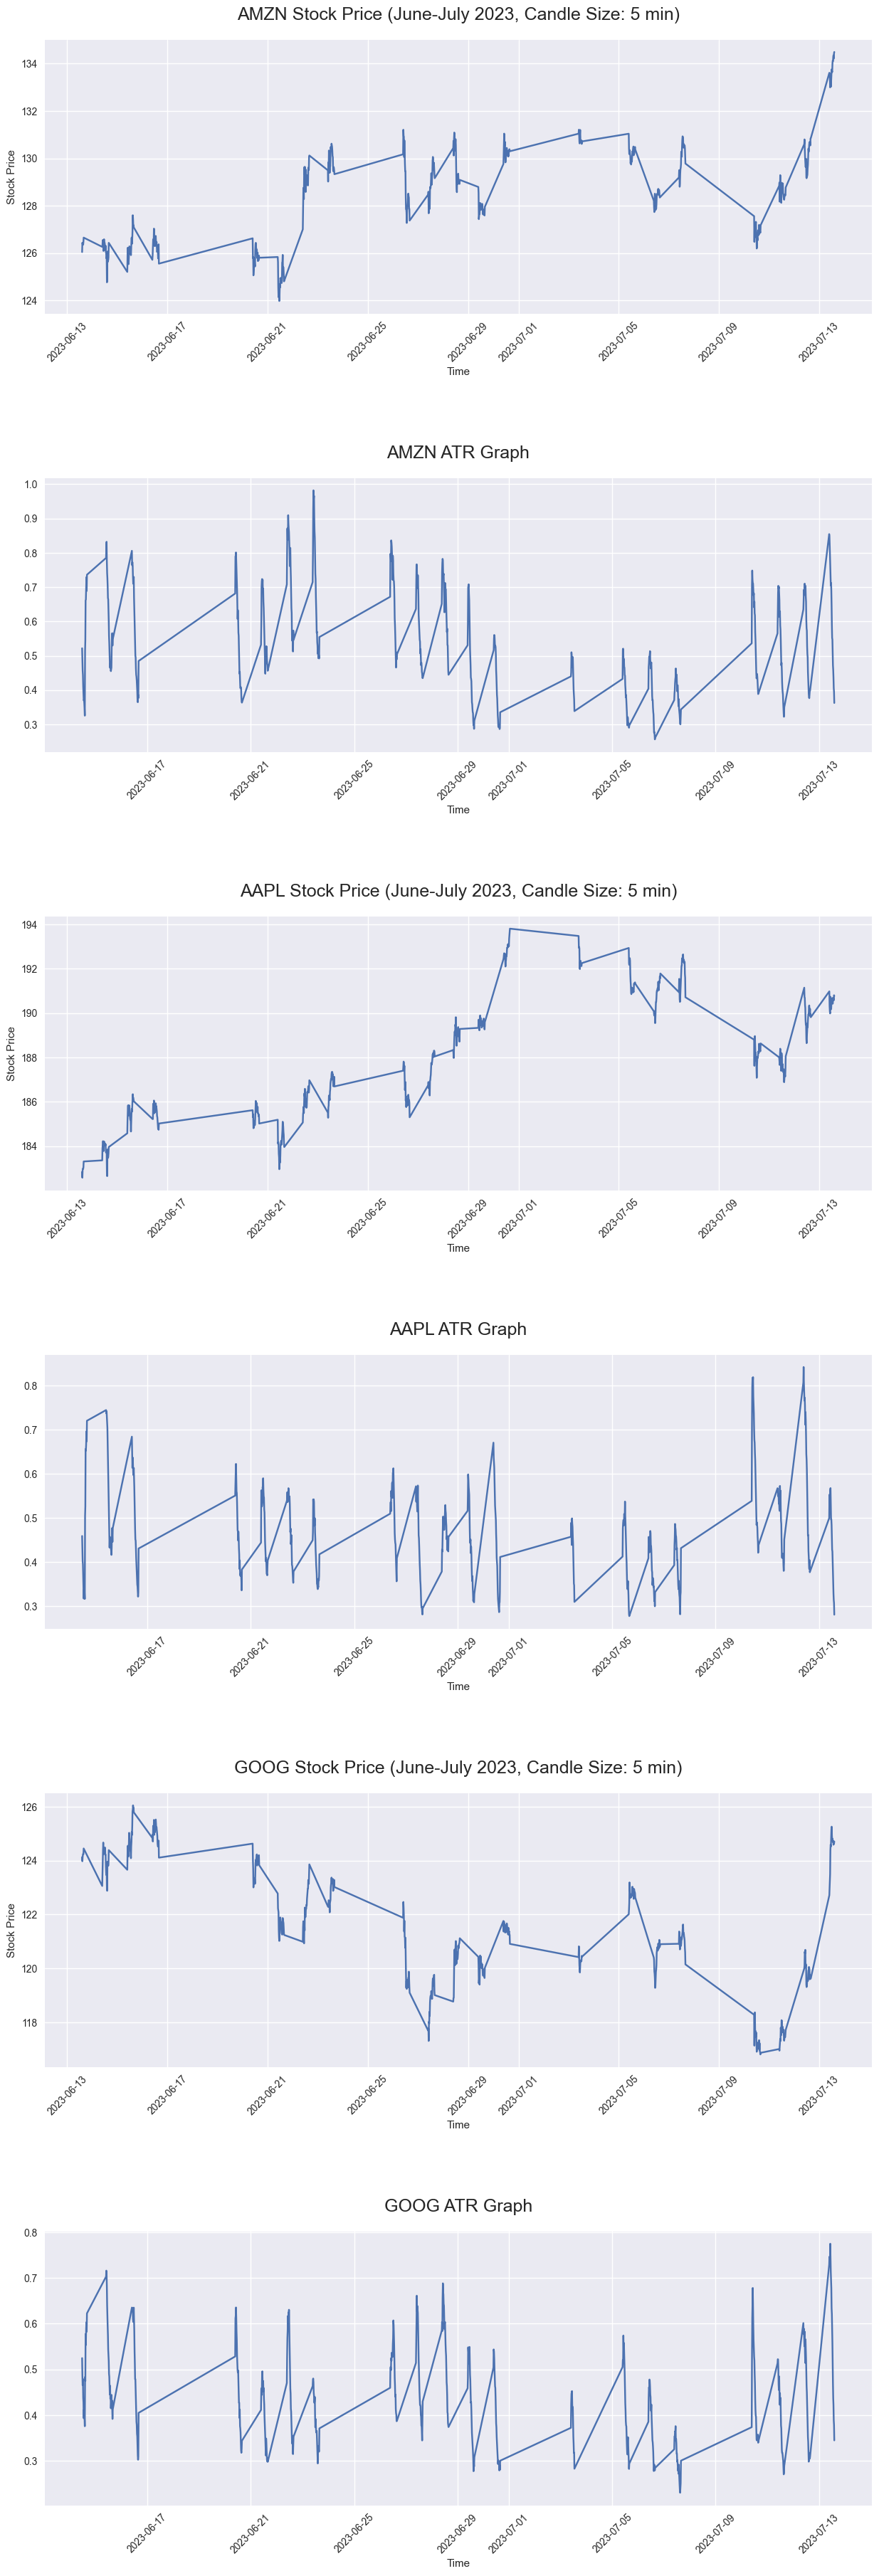

In [9]:
# --------------------------------------------------------
# Author: Daniel Xu
# Date: 07/13/2023
# Description: A program that illustrates the technical indicator of Average
#   True Range using Python and Yahoo Finance
# --------------------------------------------------------

# Import libraries
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.style as style

# GET_ATR_COLUMN - adds columns to DataFrame df regarding ATR. Takes in a window
#   variable used to calculate Rolling Average'
def get_atr_column(df, window):
    df_copy = df.copy()
    df_copy['High-Low'] = df_copy['High'] - df_copy['Low']
    df_copy['High-PC'] = df_copy['High'] - df['Adj Close'].shift(1) # shift to PREVIOUS close
    df_copy['Low-PC'] = df_copy['Low'] - df['Adj Close'].shift(1)
    df_copy['True Range'] = df_copy[['High-Low', 'High-PC', 'Low-PC']].max(axis=1, skipna=False)
    
    # Using 'com' instead of 'span' will get us closer to yfinance's Exponential Moving Average
    #   'span' is closer to TradingView's algorithm for EMA
    df_copy['ATR'] = df_copy['True Range'].ewm(span=window, min_periods=window).mean()
    
    return df_copy['ATR']

# Download historical data for various stocks
tickers = ['AMZN', 'AAPL', 'GOOG']
stock_data = {}

for t in tickers:
    data = yf.download(t, period='1mo', interval='15m') # 15 minute candles
    data.dropna(how='any', inplace=True)
    stock_data[t] = data
    
# Apply the ATR column function to each stock
for s in stock_data:
    stock_data[s]['ATR'] = get_atr_column(stock_data[s], 14)
    
%matplotlib inline

# Initialize the Matplotlib plot
fig = plt.figure(figsize=(15, 45))
gs = gridspec.GridSpec(6, 1, figure=fig)
style.use('seaborn-v0_8')

# Add subplots for all graphs, using gridspec to properly set spacing
ax1 = fig.add_subplot(gs[0:1])
ax1a = fig.add_subplot(gs[1:2])
ax2 = fig.add_subplot(gs[2:3])
ax2a = fig.add_subplot(gs[3:4])
ax3 = fig.add_subplot(gs[4:5])
ax3a = fig.add_subplot(gs[5:6])

# AMZN Generic Stock Price
ax1.set_title('AMZN Stock Price (June-July 2023, Candle Size: 5 min)', fontsize=18, pad=20)
ax1.set(xlabel='Time', ylabel="Stock Price")
ax1.plot(stock_data['AMZN'].index, stock_data['AMZN']['Close'], label='Close')
ax1.tick_params(axis='x', rotation=45)

# AMZN ATR
ax1a.set_title('AMZN ATR Graph', fontsize=18, pad=20)
ax1a.set_xlabel('Time')
ax1a.plot(stock_data['AMZN'].index, stock_data['AMZN']['ATR'], label='ATR')
ax1a.tick_params(axis='x', rotation=45)

# AAPL Generic Stock Price
ax2.set_title('AAPL Stock Price (June-July 2023, Candle Size: 5 min)', fontsize=18, pad=20)
ax2.set(xlabel='Time', ylabel="Stock Price")
ax2.plot(stock_data['AAPL'].index, stock_data['AAPL']['Close'])
ax2.tick_params(axis='x', rotation=45)

# AAPL ATR
ax2a.set_title('AAPL ATR Graph', fontsize=18, pad=20)
ax2a.set_xlabel('Time')
ax2a.plot(stock_data['AAPL'].index, stock_data['AAPL']['ATR'], label='ATR')
ax2a.tick_params(axis='x', rotation=45)

# GOOG Generic Stock Price
ax3.set_title('GOOG Stock Price (June-July 2023, Candle Size: 5 min)', fontsize=18, pad=20)
ax3.set(xlabel='Time', ylabel="Stock Price")
ax3.plot(stock_data['GOOG'].index, stock_data['GOOG']['Close'])
ax3.tick_params(axis='x', rotation=45)

# GOOG ATR
ax3a.set_title('GOOG ATR Graph', fontsize=18, pad=20)
ax3a.set_xlabel('Time')
ax3a.plot(stock_data['GOOG'].index, stock_data['GOOG']['ATR'], label='ATR')
ax3a.tick_params(axis='x', rotation=45)

gs.update(hspace=0.6)

plt.show()